In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.shape

(729322, 11)

In [4]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
data['pickup_datetime'].head()

0    2016-02-29 16:40:21
1    2016-03-11 23:35:37
2    2016-02-21 17:59:33
3    2016-01-05 09:44:31
4    2016-02-17 06:42:23
Name: pickup_datetime, dtype: object

In [7]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  object        
 10  trip_duration       729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 61.2+ MB


In [11]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

In [12]:
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [13]:
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [14]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [15]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [16]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,Friday,4,4,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


<AxesSubplot:xlabel='trip_duration'>

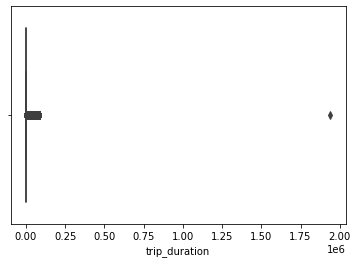

In [17]:
sns.boxplot(data['trip_duration'])

In [18]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [19]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

In [20]:
data.shape

(729321, 21)

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

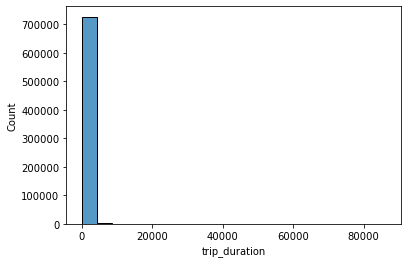

In [21]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

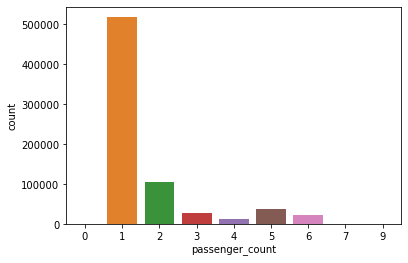

In [22]:
sns.countplot(x='passenger_count',data=data)


In [23]:
from geopy.distance import great_circle

In [24]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [25]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [26]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


In [27]:
data['distance'].value_counts()

0.000000    2901
0.000424      20
0.000424      19
0.000424      16
0.000424      11
            ... 
0.358108       1
0.809034       1
0.963164       1
0.586165       1
2.246576       1
Name: distance, Length: 726242, dtype: int64

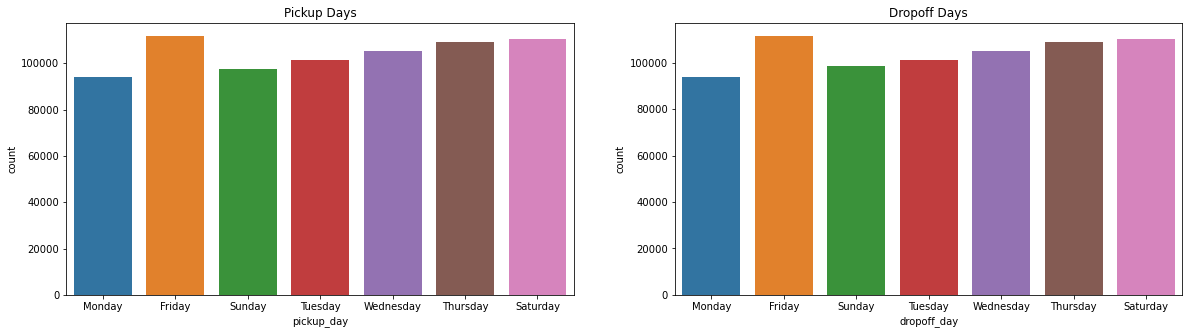

In [28]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

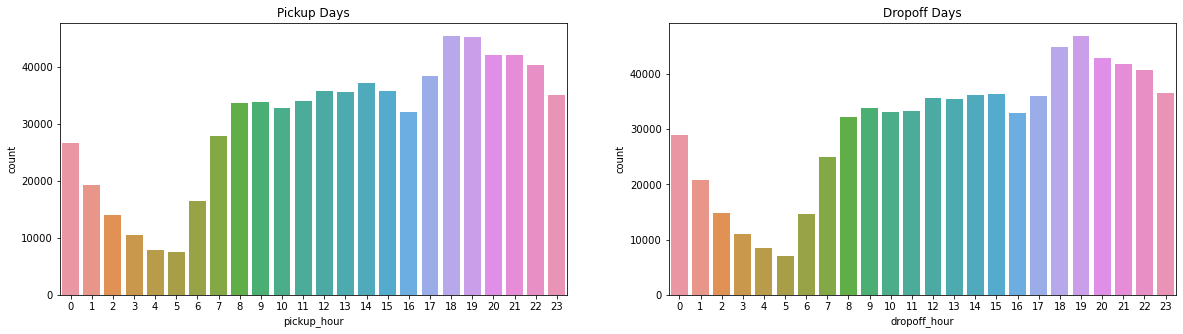

In [29]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

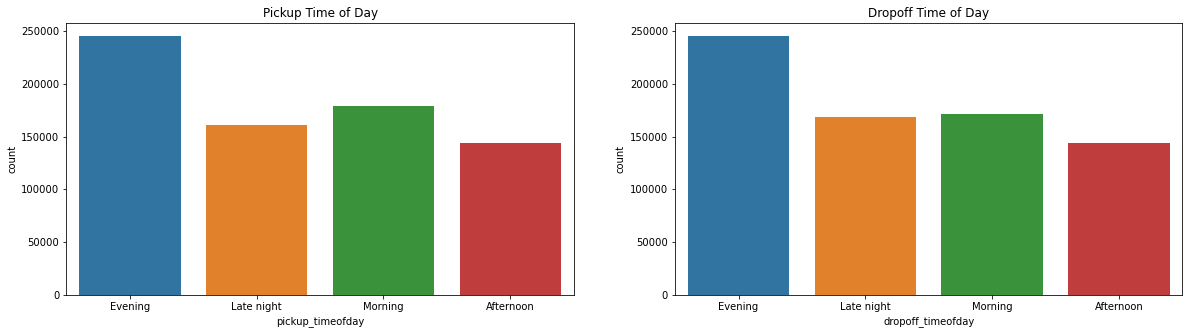

In [30]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

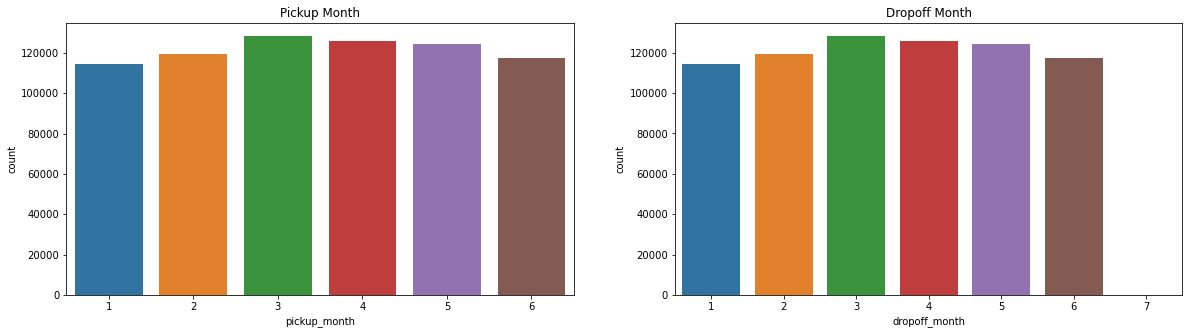

In [31]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

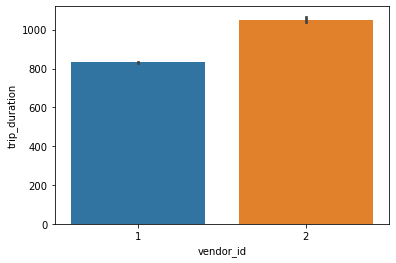

In [32]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

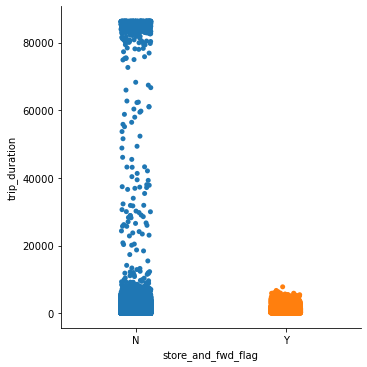

In [33]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

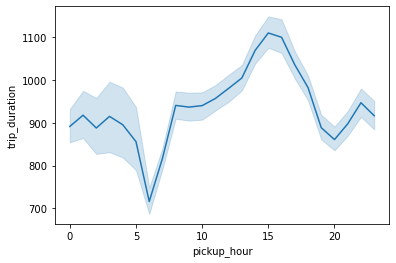

In [34]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

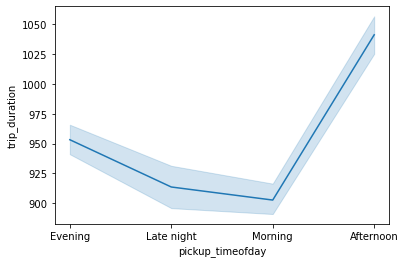

In [35]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

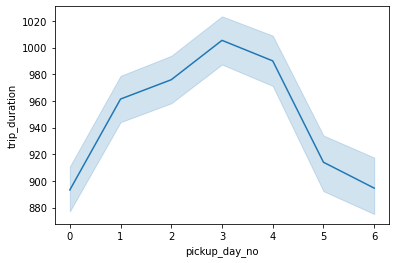

In [36]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

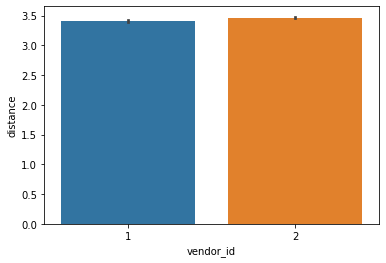

In [37]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

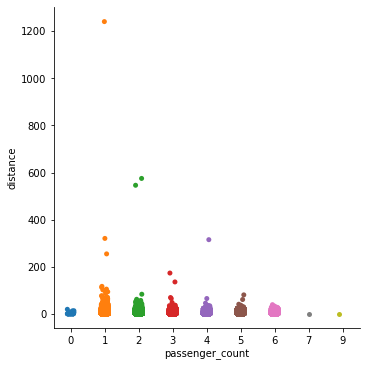

In [38]:
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

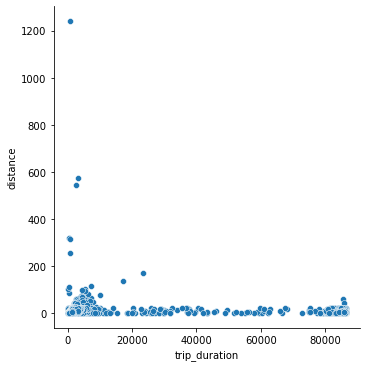

In [39]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

In [40]:
data.drop(['vendor_id'], axis=1,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729321 entries, 0 to 729321
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729321 non-null  object        
 1   pickup_datetime     729321 non-null  datetime64[ns]
 2   dropoff_datetime    729321 non-null  datetime64[ns]
 3   passenger_count     729321 non-null  int64         
 4   pickup_longitude    729321 non-null  float64       
 5   pickup_latitude     729321 non-null  float64       
 6   dropoff_longitude   729321 non-null  float64       
 7   dropoff_latitude    729321 non-null  float64       
 8   store_and_fwd_flag  729321 non-null  object        
 9   trip_duration       729321 non-null  int64         
 10  pickup_day          729321 non-null  object        
 11  dropoff_day         729321 non-null  object        
 12  pickup_day_no       729321 non-null  int64         
 13  dropoff_day_no      729321 no

In [42]:
data.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


In [43]:
from sklearn.model_selection import train_test_split
train_val_data , test_data = train_test_split(data,test_size=0.2,random_state=42)
train_data , val_data = train_test_split(train_val_data,test_size=0.25,random_state=42)

In [44]:
train_data.shape

(437592, 21)

In [45]:
train_val_data.shape

(583456, 21)

In [46]:
test_data.shape

(145865, 21)

In [47]:
input_col = ['passenger_count','pickup_latitude','dropoff_latitude','dropoff_longitude','store_and_fwd_flag','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no','pickup_hour','dropoff_hour','pickup_month','dropoff_month','pickup_timeofday','dropoff_timeofday','distance']
target_col = 'trip_duration'

In [48]:
test_data['simple_mean'] = train_data['trip_duration'].mean()

In [ ]:
# simple mean regression  model

In [49]:
from sklearn.metrics import mean_squared_error as mse


In [50]:
simple_mean_error = mse(test_data['trip_duration'] , test_data['simple_mean'])
simple_mean_error

10110900.977171497

In [51]:
train_inputs = train_data[input_col].copy()
train_targets = train_data[target_col].copy()
val_inputs = val_data[input_col].copy()
val_targets = val_data[target_col].copy()
test_inputs = test_data[input_col].copy()
test_targets = test_data[target_col].copy()
numeric_col = train_inputs.select_dtypes(include=np.number).columns.tolist()
cate_col = train_inputs.select_dtypes('object').columns.tolist()

In [52]:
train_inputs[numeric_col]

,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance
143620,1,40.738167,40.722034,-73.996368,6,6,1,2,4,4,2.050147
631000,1,40.753422,40.764721,-73.970688,5,5,7,7,6,6,1.427641
255733,1,40.733917,40.748215,-73.988129,3,3,23,23,6,6,2.000437
376506,1,40.756855,40.749161,-73.984840,2,2,15,16,6,6,1.227660
568474,1,40.790512,40.764568,-73.977791,0,0,11,11,2,2,2.897170
...,...,...,...,...,...,...,...,...,...,...,...
164176,6,40.767532,40.760551,-73.981956,1,1,8,8,5,5,0.850260
385170,1,40.717102,40.735249,-73.955025,2,2,18,19,6,6,2.021615
670284,1,40.744347,40.762470,-73.974251,5,5,9,9,1,1,2.055272
457836,2,40.771446,40.770176,-73.964325,5,5,17,17,3,3,1.529215


In [53]:
train_inputs[cate_col]

,store_and_fwd_flag,pickup_day,dropoff_day,pickup_timeofday,dropoff_timeofday
143620,N,Sunday,Sunday,Late night,Late night
631000,N,Saturday,Saturday,Morning,Morning
255733,N,Thursday,Thursday,Late night,Late night
376506,N,Wednesday,Wednesday,Afternoon,Evening
568474,N,Monday,Monday,Morning,Morning
...,...,...,...,...,...
164176,N,Tuesday,Tuesday,Morning,Morning
385170,N,Wednesday,Wednesday,Evening,Evening
670284,N,Saturday,Saturday,Morning,Morning
457836,N,Saturday,Saturday,Evening,Evening


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_col])
MinMaxScaler(copy=True, feature_range=(0, 1))
train_inputs[numeric_col] = scaler.transform(train_inputs[numeric_col])
val_inputs[numeric_col]  = scaler.transform(val_inputs[numeric_col])
test_inputs[numeric_col] = scaler.transform(test_inputs[numeric_col])

In [55]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [56]:
from sklearn.metrics import mean_squared_error as mse

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(sparse=False,handle_unknown='ignore')


In [58]:
encoder.fit(train_inputs[cate_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [69]:
enc_col = encoder.get_feature_names(cate_col).tolist()
enc_col

['store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Friday',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday',
 'dropoff_day_Friday',
 'dropoff_day_Monday',
 'dropoff_day_Saturday',
 'dropoff_day_Sunday',
 'dropoff_day_Thursday',
 'dropoff_day_Tuesday',
 'dropoff_day_Wednesday',
 'pickup_timeofday_Afternoon',
 'pickup_timeofday_Evening',
 'pickup_timeofday_Late night',
 'pickup_timeofday_Morning',
 'dropoff_timeofday_Afternoon',
 'dropoff_timeofday_Evening',
 'dropoff_timeofday_Late night',
 'dropoff_timeofday_Morning']

In [60]:
train_inputs[enc_col] = encoder.transform(train_inputs[cate_col])
val_inputs[enc_col] = encoder.transform(val_inputs[cate_col])
test_inputs[enc_col] = encoder.transform(test_inputs[cate_col])

In [70]:
train_inputs.head()

,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,store_and_fwd_flag,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,...,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,dropoff_timeofday_Afternoon,dropoff_timeofday_Evening,dropoff_timeofday_Late night,dropoff_timeofday_Morning
143620,0.142857,0.655026,0.728085,0.932237,N,Sunday,Sunday,1.000000,1.000000,0.043478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
631000,0.142857,0.656685,0.731724,0.932736,N,Saturday,Saturday,0.833333,0.833333,0.304348,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255733,0.142857,0.654564,0.730317,0.932397,N,Thursday,Thursday,0.500000,0.500000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
376506,0.142857,0.657058,0.730398,0.932461,N,Wednesday,Wednesday,0.333333,0.333333,0.652174,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
568474,0.142857,0.660716,0.731711,0.932598,N,Monday,Monday,0.000000,0.000000,0.478261,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [62]:
val_inputs

,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,store_and_fwd_flag,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,...,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,dropoff_timeofday_Afternoon,dropoff_timeofday_Evening,dropoff_timeofday_Late night,dropoff_timeofday_Morning
676092,0.142857,0.655848,0.730384,0.932327,N,Thursday,Thursday,0.500000,0.500000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
25062,0.285714,0.655133,0.730361,0.932255,N,Sunday,Sunday,1.000000,1.000000,0.739130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
153467,0.142857,0.657752,0.731883,0.932421,N,Thursday,Thursday,0.500000,0.500000,0.739130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
551167,0.142857,0.654417,0.728301,0.932458,N,Wednesday,Wednesday,0.333333,0.333333,1.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
577457,0.142857,0.659263,0.733940,0.932621,N,Wednesday,Wednesday,0.333333,0.333333,0.913043,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463677,0.142857,0.648809,0.724165,0.932187,N,Thursday,Thursday,0.500000,0.500000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58476,0.142857,0.654430,0.731987,0.934852,N,Sunday,Sunday,1.000000,1.000000,0.695652,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
194967,0.142857,0.656888,0.730628,0.932589,N,Monday,Monday,0.000000,0.000000,0.652174,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
335125,0.142857,0.653764,0.730042,0.932508,N,Sunday,Sunday,1.000000,1.000000,0.086957,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [63]:
x_train = train_inputs[numeric_col + enc_col]
x_val = val_inputs[numeric_col+enc_col]
x_test = test_inputs[numeric_col + enc_col]

In [64]:
train_inputs.head()

,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,store_and_fwd_flag,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,...,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,dropoff_timeofday_Afternoon,dropoff_timeofday_Evening,dropoff_timeofday_Late night,dropoff_timeofday_Morning
143620,0.142857,0.655026,0.728085,0.932237,N,Sunday,Sunday,1.000000,1.000000,0.043478,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
631000,0.142857,0.656685,0.731724,0.932736,N,Saturday,Saturday,0.833333,0.833333,0.304348,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255733,0.142857,0.654564,0.730317,0.932397,N,Thursday,Thursday,0.500000,0.500000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
376506,0.142857,0.657058,0.730398,0.932461,N,Wednesday,Wednesday,0.333333,0.333333,0.652174,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
568474,0.142857,0.660716,0.731711,0.932598,N,Monday,Monday,0.000000,0.000000,0.478261,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [65]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437592 entries, 143620 to 64817
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   passenger_count               437592 non-null  float64
 1   pickup_latitude               437592 non-null  float64
 2   dropoff_latitude              437592 non-null  float64
 3   dropoff_longitude             437592 non-null  float64
 4   store_and_fwd_flag            437592 non-null  object 
 5   pickup_day                    437592 non-null  object 
 6   dropoff_day                   437592 non-null  object 
 7   pickup_day_no                 437592 non-null  float64
 8   dropoff_day_no                437592 non-null  float64
 9   pickup_hour                   437592 non-null  float64
 10  dropoff_hour                  437592 non-null  float64
 11  pickup_month                  437592 non-null  float64
 12  dropoff_month                 437592 non

In [71]:
train_inputs.drop(['store_and_fwd_flag','pickup_day','dropoff_day','pickup_timeofday','dropoff_timeofday'], axis=1,inplace=True)

In [74]:
test_inputs.drop(['store_and_fwd_flag','pickup_day','dropoff_day','pickup_timeofday','dropoff_timeofday'], axis=1,inplace=True)

In [76]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145865 entries, 704326 to 78491
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   passenger_count               145865 non-null  float64
 1   pickup_latitude               145865 non-null  float64
 2   dropoff_latitude              145865 non-null  float64
 3   dropoff_longitude             145865 non-null  float64
 4   pickup_day_no                 145865 non-null  float64
 5   dropoff_day_no                145865 non-null  float64
 6   pickup_hour                   145865 non-null  float64
 7   dropoff_hour                  145865 non-null  float64
 8   pickup_month                  145865 non-null  float64
 9   dropoff_month                 145865 non-null  float64
 10  distance                      145865 non-null  float64
 11  store_and_fwd_flag_N          145865 non-null  float64
 12  store_and_fwd_flag_Y          145865 non

In [ ]:
# KNN regression

In [77]:
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_inputs, train_targets)

KNeighborsRegressor()

In [78]:
test_predict = reg.predict(test_inputs)
k = mse(test_predict, test_targets)
print('Test MSE    ', k )

Test MSE     487337.7184763995


In [79]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_inputs, train_targets)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_inputs)
        tmp = mse(tmp,test_targets)
        test_mse.append(tmp)
    
    return test_mse

In [ ]:
#linear regression 

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression()

In [87]:
model.fit(train_inputs,train_targets)

LinearRegression()

In [89]:
model.predict(test_inputs)

array([ 661. ,  736. , 1316. , ..., 1013.5,  698.5, 1705.5])

In [90]:
print(model.score(test_inputs, test_targets))

0.02176675743442391


In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(train_inputs),train_targets,squared=False)

3068.1656602840103

In [92]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_inputs, train_targets)
y_pred_lasso = lasso.predict(test_inputs)
mse = mean_squared_error(test_targets, y_pred_lasso)
print(mse)

9890937.190406412


In [93]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_inputs, train_targets)
y_pred_ridge = ridge.predict(test_inputs)
mse = mean_squared_error(test_targets, y_pred_ridge)
print(mse)

9871020.440708082


In [ ]:
# decision tree regressor

In [94]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=0)

In [96]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot')

In [98]:
y_1 = regressor.predict(test_inputs)

In [103]:
y_1

array([ 552.,  448., 1356., ...,  850.,  895., 1380.])

In [ ]:
#evaluation metrics

In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(x_train),train_targets,squared=False)

3068.1656602840103